In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score


In [4]:
df=pd.read_csv('diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
def hist(vr,dataframe):
    plt.figure(figsize = (10,4))
    plt.hist(dataframe[vr], bins = 50)
    plt.xlabel(vr)
    plt.ylabel("Frequency")
    plt.title("{} distribution".format(vr))
    plt.show()

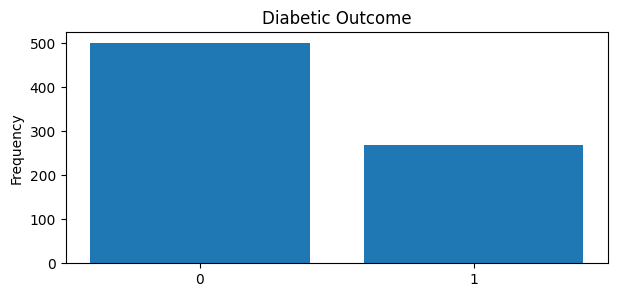

In [13]:
vValue=df['Outcome'].value_counts()
plt.figure(figsize = (7,3))
plt.bar(vValue.index, vValue)
plt.xticks(vValue.index, vValue.index.values)
plt.ylabel("Frequency")
plt.title('Diabetic Outcome')
plt.show()

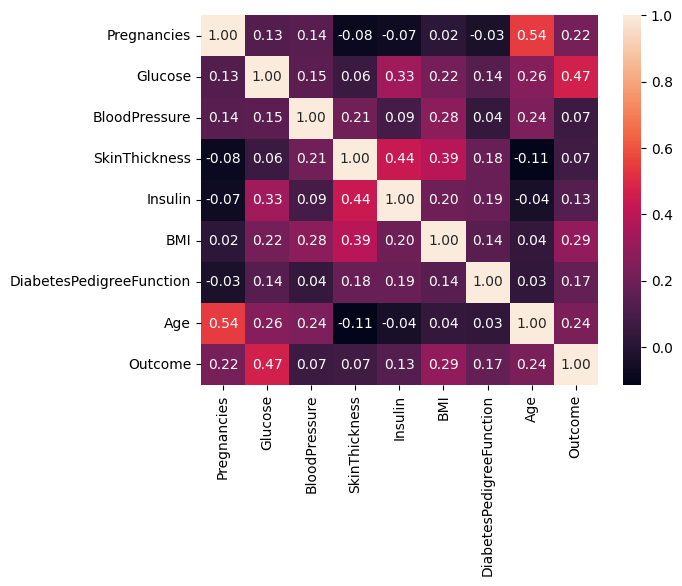

In [14]:
sns.heatmap(df.corr(), annot = True, fmt = ".2f")
plt.show()

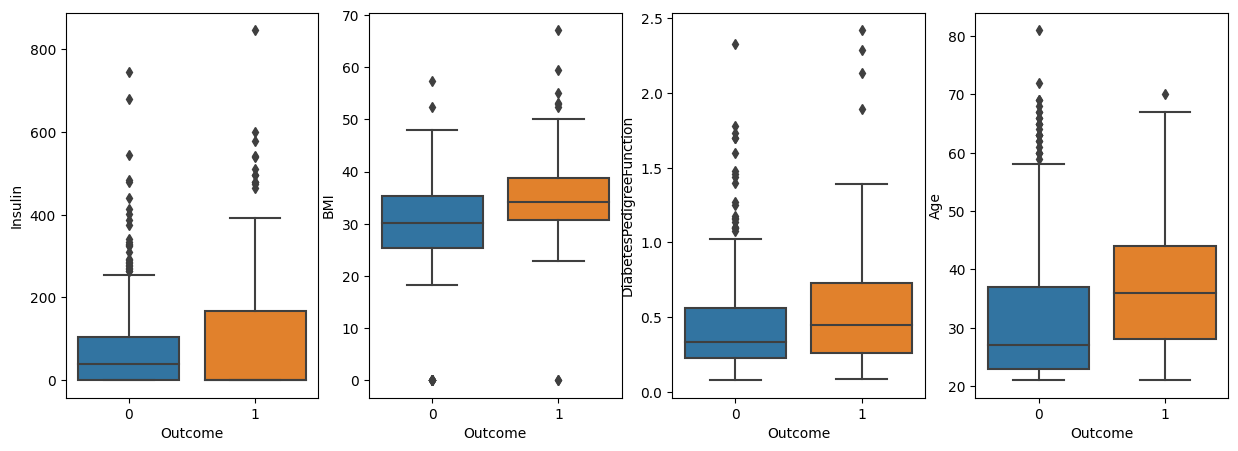

In [15]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (15,5))
sns.boxplot(ax = axes[0],x = "Outcome", y = "Insulin", data = df)
sns.boxplot(ax = axes[1],x = "Outcome", y = "BMI", data = df)
sns.boxplot(ax = axes[2],x = "Outcome", y = "DiabetesPedigreeFunction", data = df)
sns.boxplot(ax = axes[3],x = "Outcome", y = "Age",data = df)
plt.show()

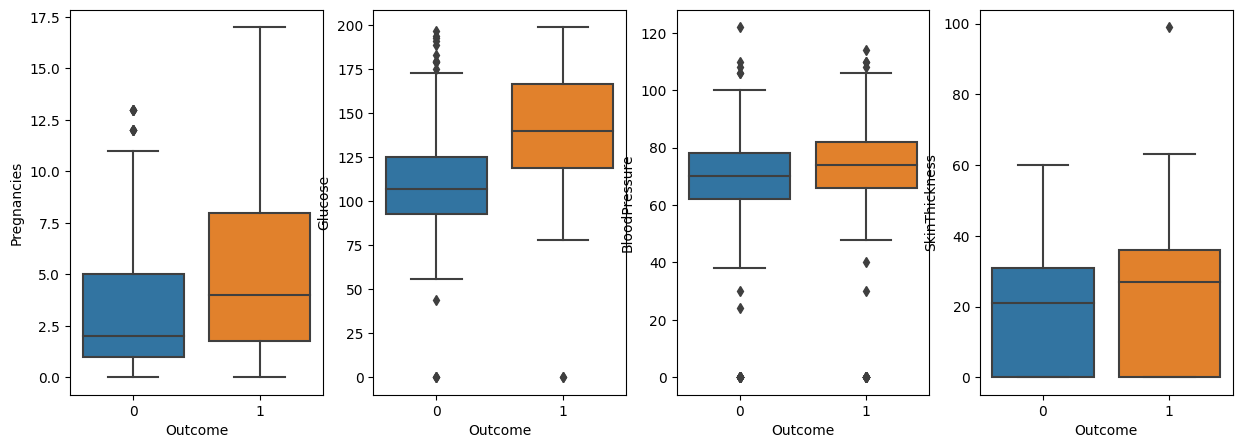

In [16]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (15,5))
sns.boxplot(ax = axes[0],x = "Outcome", y = "Pregnancies", data = df)
sns.boxplot(ax = axes[1],x = "Outcome", y = "Glucose", data = df)
sns.boxplot(ax = axes[2],x = "Outcome", y = "BloodPressure", data = df)
sns.boxplot(ax = axes[3],x = "Outcome", y = "SkinThickness",data = df)
plt.show()

In [17]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [18]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
from sklearn.utils import resample


In [20]:
#oversampling
majority=df[df['Outcome']==0]
minority=df[df['Outcome']==1]
oversampled=resample(minority, replace=True, n_samples=len(majority), random_state=52)

In [21]:
oversampled_ = pd.concat([majority, oversampled])
oversampled_ = oversampled_.sample(frac=1, random_state=42).reset_index(drop=True)


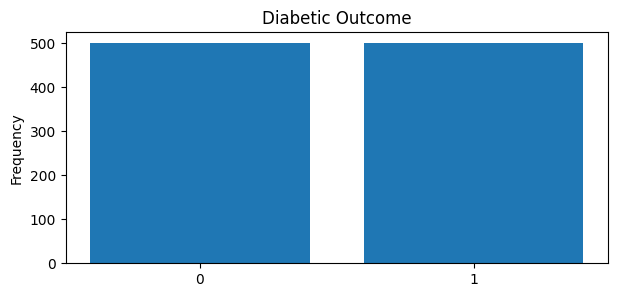

In [22]:
vValue=oversampled_['Outcome'].value_counts()
plt.figure(figsize = (7,3))
plt.bar(vValue.index, vValue)
plt.xticks(vValue.index, vValue.index.values)
plt.ylabel("Frequency")
plt.title('Diabetic Outcome')
plt.show()

In [23]:
X=df.drop(labels='Outcome',axis=1)
y=df['Outcome']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7599)

In [25]:
from numpy.random.mtrand import RandomState
#Bayesian Model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [26]:
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.765625


In [27]:
param_grid = {
    'alpha': np.logspace(-3, 0, num=100),
    'fit_prior': [True, False],
    'class_prior': [None, [0.3, 0.7]],  # Manually set prior probabilities for each class
#     'normalize': [True, False],  # Normalize the term frequencies before training
#     'binarize': [None, 0.0, 0.5]  # Threshold for binarizing the input features
 }
# Grid Search
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237...
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
                         'class_prior': [None, [0.3, 0.7]],
                         'fit_prior': [True, False]})

In [28]:
grid_predictions = grid_search.predict(X_test)

# Calculate the accuracy of the models
grid_accuracy = accuracy_score(y_test, grid_predictions)

In [29]:
grid_accuracy

0.765625

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score


In [31]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

In [32]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("AUC-ROC:", roc_auc)

Accuracy: 0.765625
Precision: 0.5789473684210527
Recall: 0.7719298245614035
F1-Score: 0.6616541353383459
Confusion Matrix:
 [[103  32]
 [ 13  44]]
AUC-ROC: 0.7935022742040285
